# HW6 Q1(d)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio

from collections import Counter
import random

from tabulate import tabulate

In [2]:
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [3]:
data = sio.loadmat('mnist.mat')

### Converting data from uint8 to float

In [4]:
print("Type Before type-casting: "+str(type(data['trainX'][0][19])))

XTrain = data['trainX'].astype(float)
yTrain = data['trainY'][0].astype(float)

XTest = data['testX'].astype(float)
yTest = data['testY'][0].astype(float)

print("Type After  type-casting: "+str(type(XTrain[0][19])))

Type Before type-casting: <class 'numpy.uint8'>
Type After  type-casting: <class 'numpy.float64'>


In [5]:
scaler = StandardScaler()
XTrain = scaler.fit_transform(XTrain)
XTest = scaler.fit_transform(XTest)

In [6]:
print("Shape of XTrain: "+str(np.shape(XTrain)))
print("Shape of yTrain: "+str(np.shape(yTrain)))

print("Shape of XTest: "+str(np.shape(XTest)))
print("Shape of yTest: "+str(np.shape(yTest)))

Shape of XTrain: (60000, 784)
Shape of yTrain: (60000,)
Shape of XTest: (10000, 784)
Shape of yTest: (10000,)


In [7]:
def sigmoid(x):     
    return (1 / (1 + np.exp(-x)))

def costFunction(h,theta, y):
    m = len(y)
    cost = (1 / m) * (np.sum(-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))))
    return cost

def gradientDescent(X,h,theta,y,m,alpha=0.01): # This function calculates the theta value by gradient descent
    gradient_value = np.dot(X.T, (h - y)) / m
    theta -= alpha * gradient_value
    return theta

def predict(X, theta):
    X = np.insert(X, 0, 1, axis=1)
    X_predicted = [max((sigmoid(i.dot(thetaTemp)), c) for thetaTemp, c in theta)[1] for i in X ]
    return X_predicted


def getMisClassificationRate(y,yPred):
    total = 0
    for i in range(len(y)):
        if y[i] == yPred[i]:
            total+=1
    return 1 - total/len(y)

def plotCost(cost): 
    df = pd.DataFrame(data=cost)
    for i in range(df.shape[1]):
        plt.plot(df[i],'r')
        plt.title("Cost Function Vs Iterations " + '(' + str(i) +" vs All)")
        plt.xlabel("Number of Iterations")
        plt.ylabel("Cost")
        plt.show()                        

def plotMisClassificationRate(misClassificationRate, datasetType):  
    plt.figure(figsize=(12,8))
    plt.plot(misClassificationRate)
    plt.title("misClassificationRate Vs Iterations ("+str(datasetType) + ')',fontsize=18)
    plt.xlabel("Number of Iterations",fontsize=12)
    plt.ylabel("misClassificationRate",fontsize=12)
    plt.show()   

In [8]:
def fitLogisticRegression(X, y, XTest, yTest,iterations):
    
    theta = [[]] * 10
    cost = np.zeros((iterations,10))
    # The bias component
    XT = X.copy()
    X = np.insert(X, 0, 1, axis=1)
    m = len(y)
    
    misClassificationRateTest = []
    misClassificationRateTrain = []
    # Building a one vs all model                
    for iteration in range(iterations):        
        for i in np.unique(y):
            # Uniqie values will be [0,1,2,3,4,5,6,7,8,9]
            y_onevsall = np.where(y == i, 1, 0)        
            # number of features (28 * 28 = 784)
            if iteration == 0:
                thetaTemp = np.zeros(X.shape[1]) 
            else:
                thetaTemp = theta[int(i)][0]

            z = X.dot(thetaTemp)
            h = sigmoid(z)
            thetaTemp = gradientDescent(X,h,thetaTemp,y_onevsall,m)
            costTemp = costFunction(h,thetaTemp,y_onevsall)
            theta[int(i)] = [thetaTemp,i]
            cost[iteration][int(i)] = costTemp
        predition1 = predict(XTest,theta)
        score1 = getMisClassificationRate(predition1,yTest)
        misClassificationRateTest.append(score1)
        
        predition2 = predict(XT,theta)
        score2 = getMisClassificationRate(predition2,y)
        misClassificationRateTrain.append(score2)
        
    return theta,cost,misClassificationRateTest, misClassificationRateTrain    

In [9]:
theta,cost,misClassificationRateTest, misClassificationRateTrain = fitLogisticRegression(XTrain, yTrain,
                                                                                        XTest,yTest,
                                                                                        500)

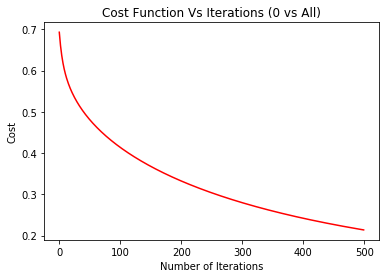

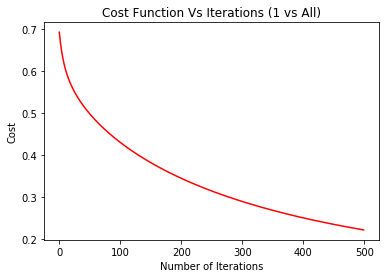

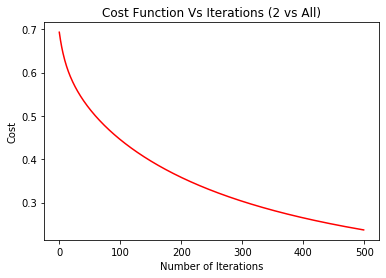

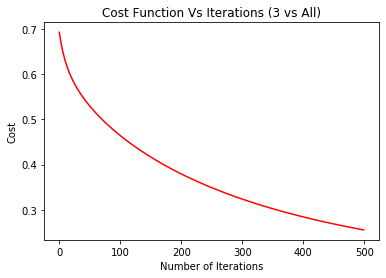

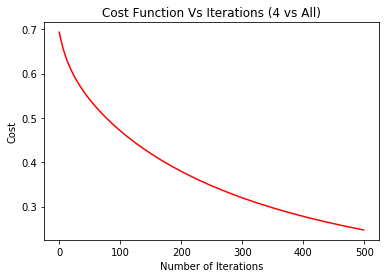

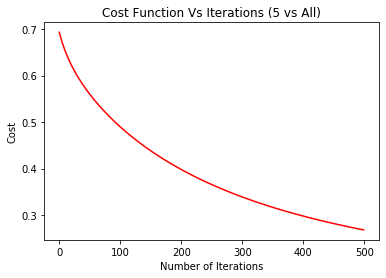

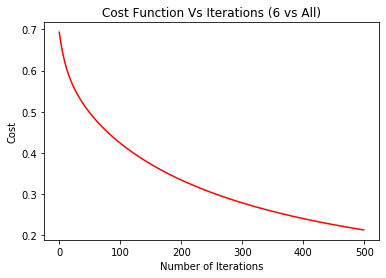

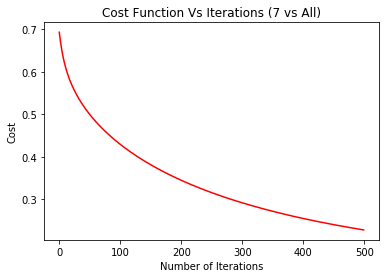

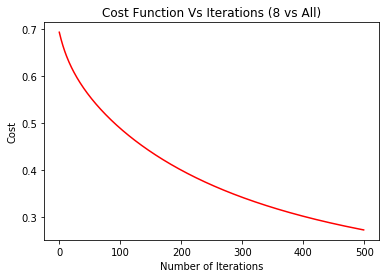

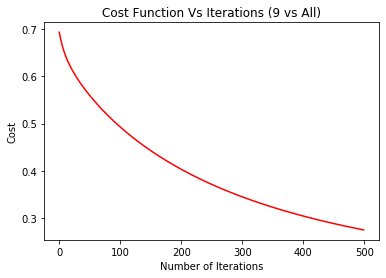

In [10]:
plotCost(cost)

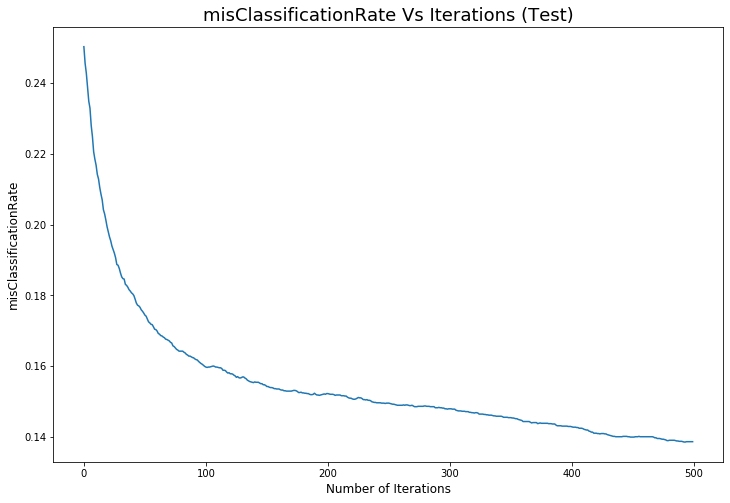

In [11]:
plotMisClassificationRate(misClassificationRateTest, "Test")

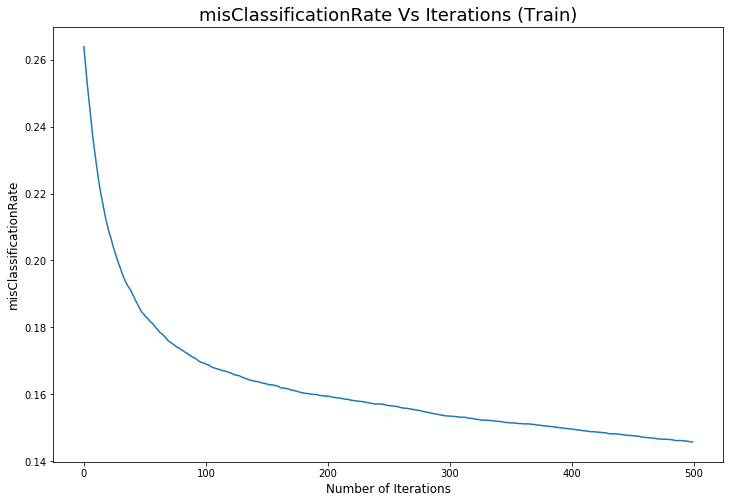

In [12]:
plotMisClassificationRate(misClassificationRateTrain, "Train")

In [15]:
finalTestMisClassificationRate = round(misClassificationRateTest[-1]*100,3)
finalTrainMisClassificationRate = round(misClassificationRateTrain[-1]*100,3)

# The Final Train misclassification rate:  14.57%

# The Final Test misclassification rate:  13.86%

# Resources:

1) https://gluon.mxnet.io/chapter02_supervised-learning/softmax-regression-scratch.html

2)https://www.pugetsystems.com/labs/hpc/Machine-Learning-and-Data-Science-Multinomial-Multiclass-Logistic-Regression-1007/

3) https://www.codeproject.com/Articles/821347/MultiClass-Logistic-Classifier-in-Python